### 3.2.6 Изучение гальванометра

In [1]:
import pandas as pd
fname = 'Rx.tsv'

R2 = 10E3
R1 = R2/ 2000
R0 = 610
U0 = 69 * (3/150)

Rx = pd.read_csv(fname, sep='\t')
Rx

,"R, Ом","x, см"
0,3000,18.40
1,5000,11.90
2,7000,8.80
3,9000,7.00
4,13000,5.00
5,18000,3.65
6,23000,3.00
7,28000,2.50


Коэффиценты прямой: k, s_k, b, s_b
1.0491154305738176e-08	2.06103342528729e-11	-1.796759846185013e-09	1.0469377496041113e-10
CI = 2.864085125466522e-07
+- 1.1904754737893572e-08


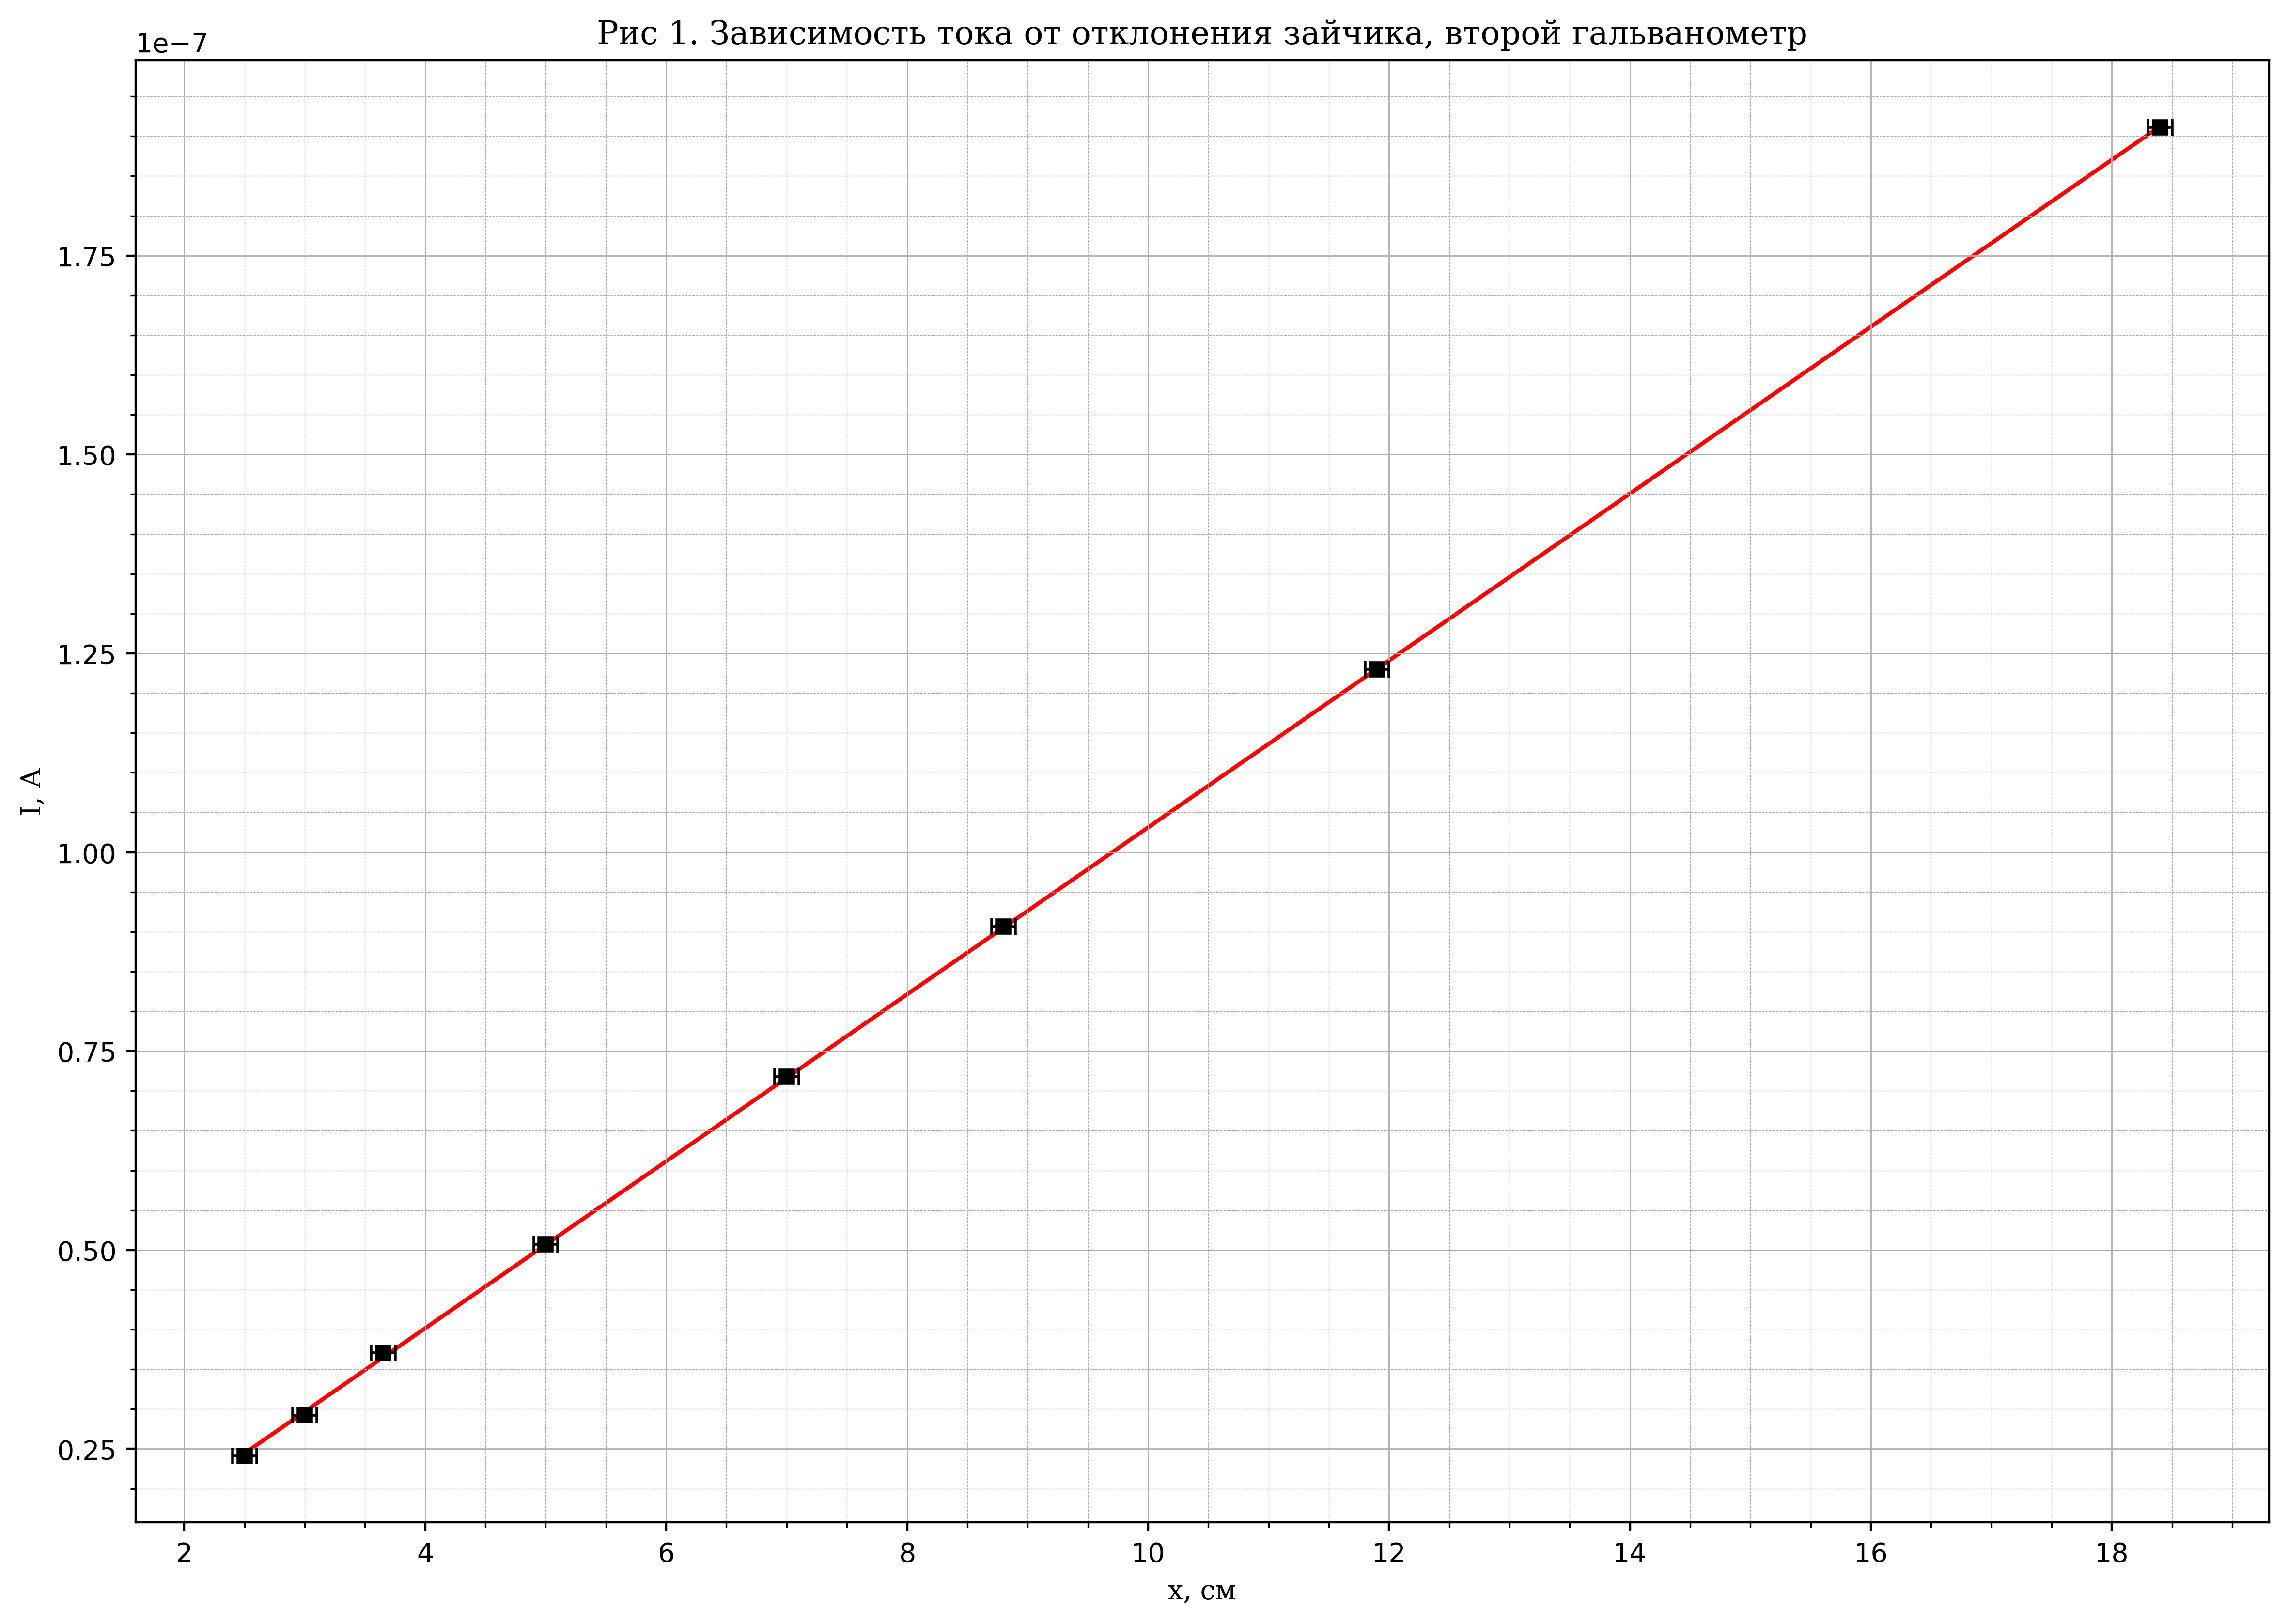

In [2]:
import matplotlib.pyplot as plt
import mygraph as mg
import numpy as np
I = np.array( [ U0 * (R1/R2) * 1/(R + R0) for R in Rx['R, Ом'] ] )

fig1 = mg.make_figure(dpi_mode='high')
ax1 = fig1.add_subplot()
mg.set_grids(fig1)
mg.set_label(ax1, 'x, см', 'I, А')
mg.set_title(ax1, 'Зависимость тока от отклонения зайчика, второй гальванометр')

mg.draw_errorbar(ax1, Rx['x, см'], I, x_err=0.1)
k, s_k, b, s_b = mg.linls(np.array(Rx['x, см']), I)
mg.display_linls(ax1)

Ix = k * 10
a = 136.5 / 100 # см
CI = Ix  * 2*a
print(f'CI = {CI}')
sigma = np.sqrt(
    np.square( 2 * k * 0.5 ) +\
    np.square( 2 * 136.5 * s_k )
)
print(f'+- {sigma}')

In [3]:
import pandas as pd
fname = 'Rl.tsv'
a = 136.5 # см
R2 = 10E3
R1 = R2 / 20
C = 2e-6
R0 = 610
U0 = 69 * (3/150)
Rl = pd.read_csv(fname, sep='\t')
Rl

,"l, см","R, Ом"
0,16.40,50000
1,15.80,40000
2,14.80,30000
3,13.30,20000
4,10.40,10000
5,8.80,8000
6,7.55,6000
7,5.60,4000
8,3.20,2000


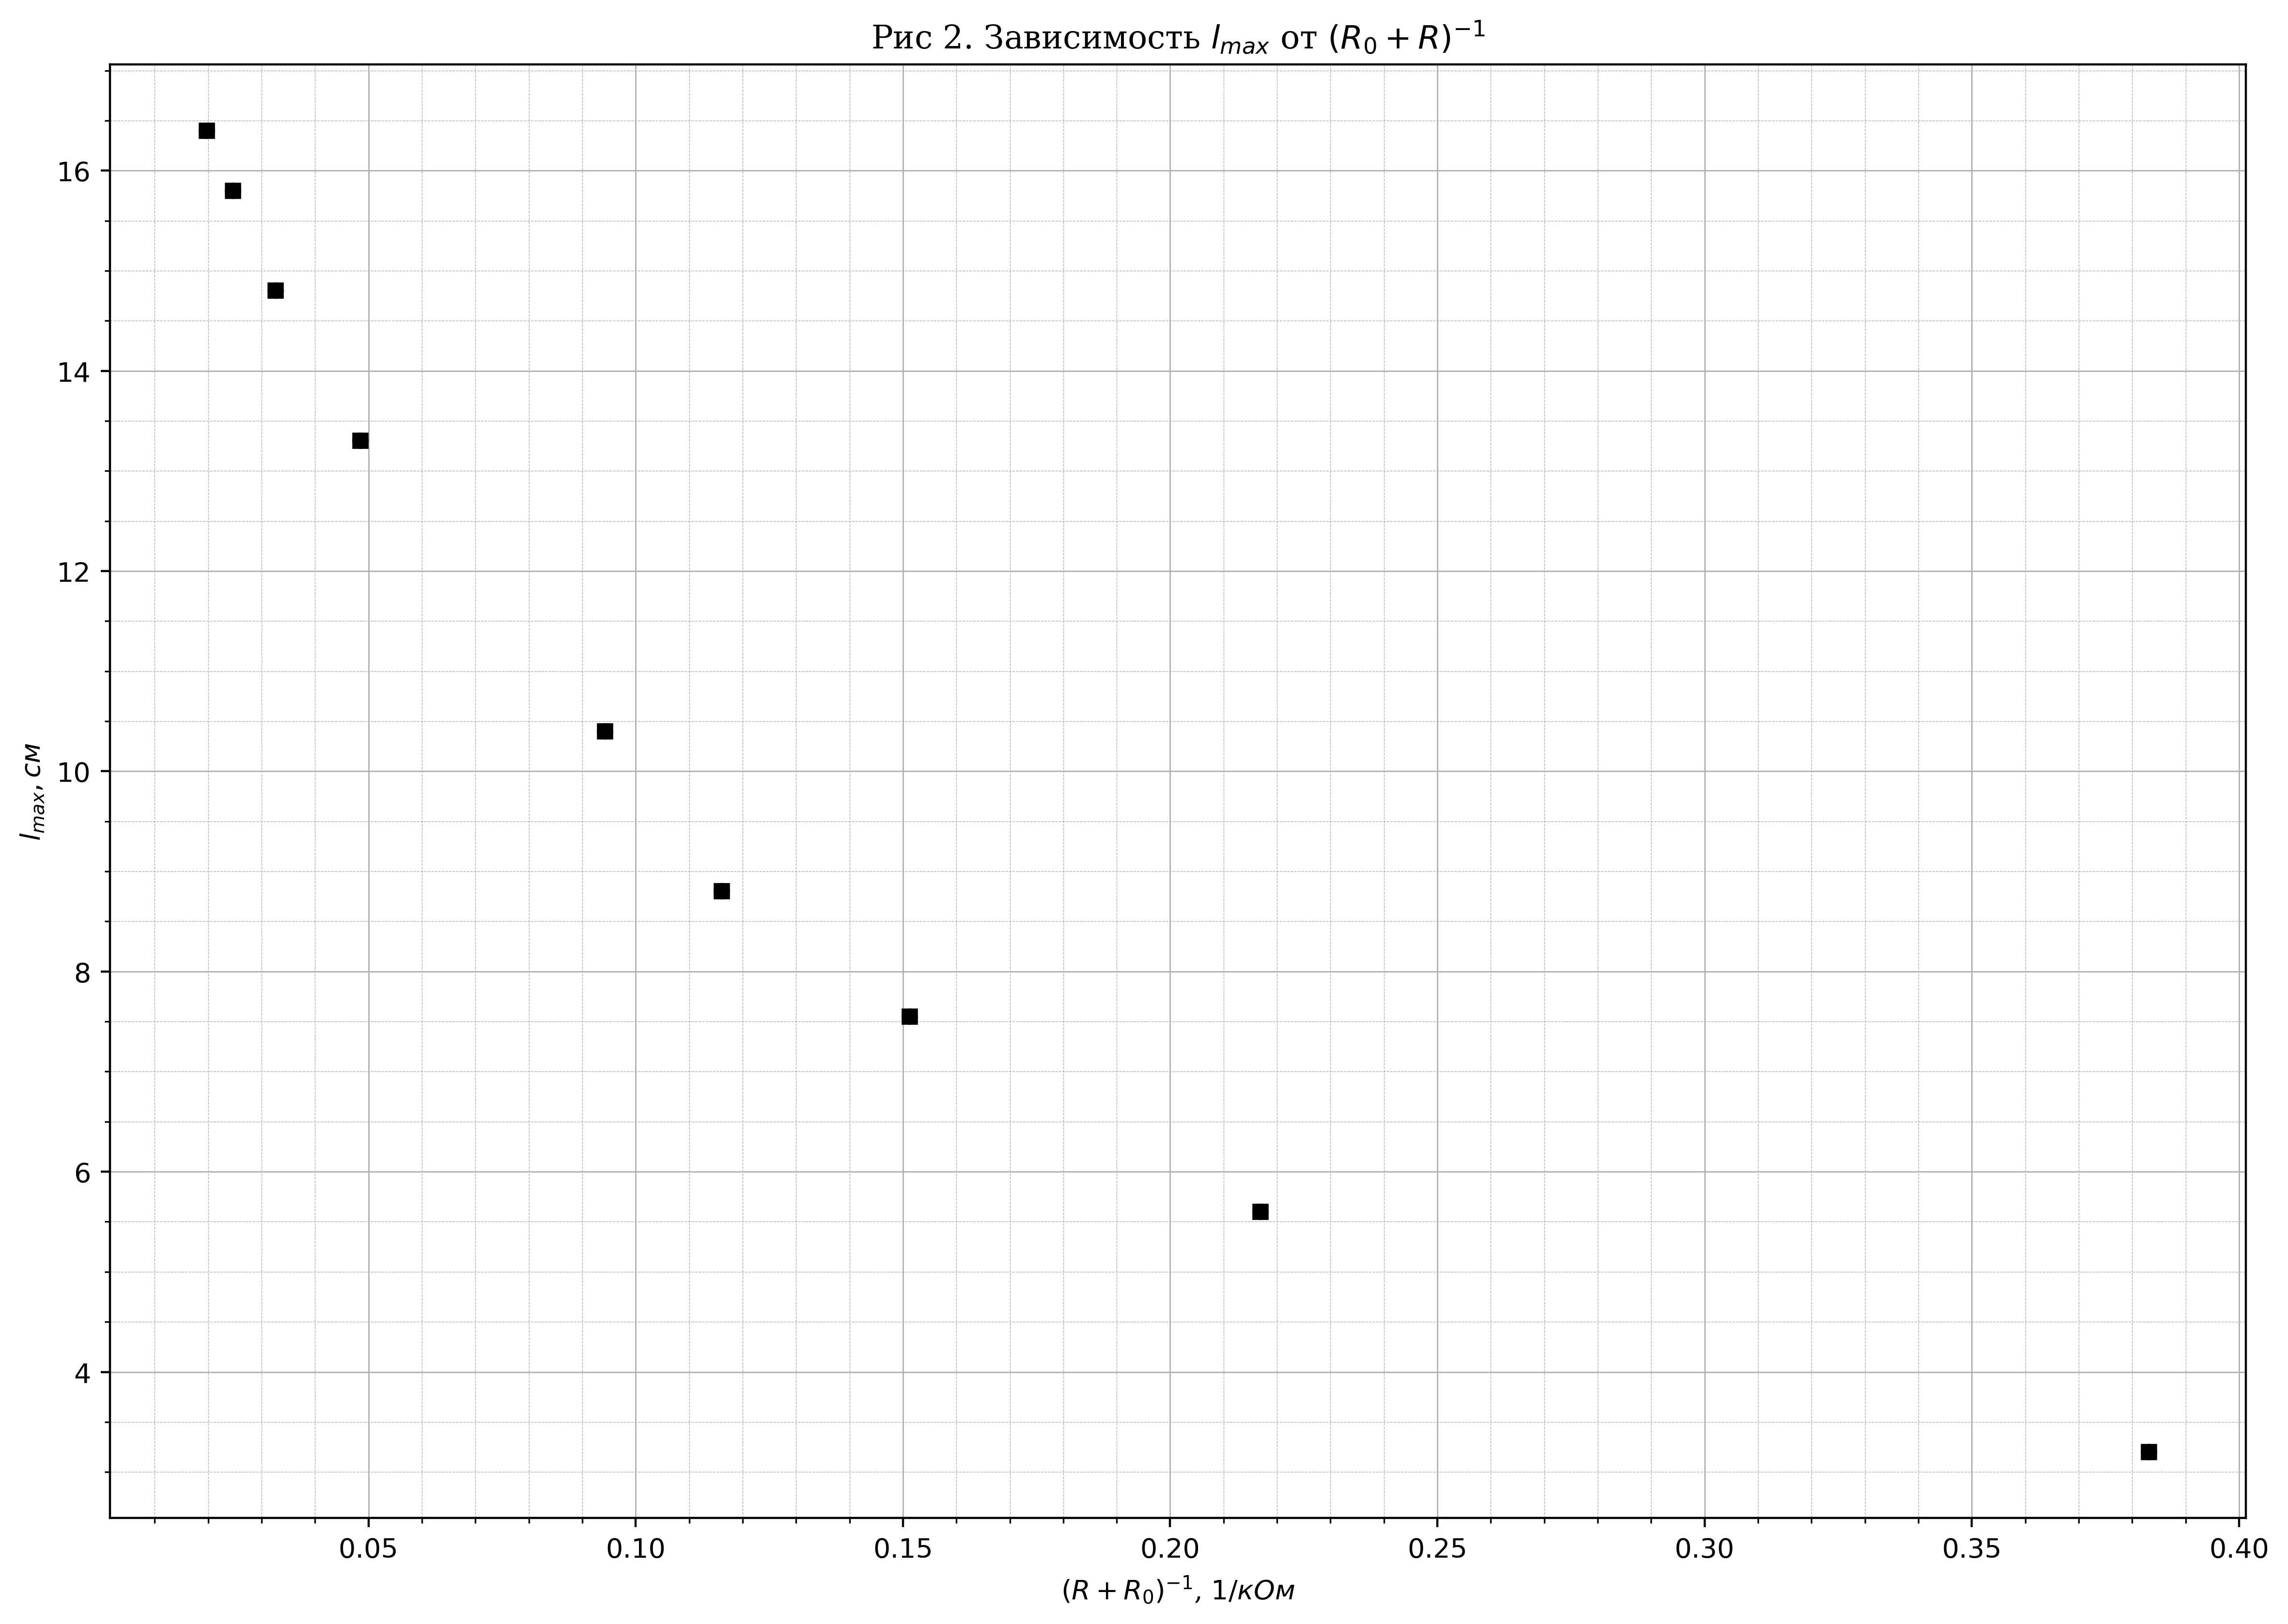

In [4]:
fig3 = mg.make_figure(dpi_mode='high')
ax3 = fig3.add_subplot()
mg.set_grids(fig3)
mg.set_label(ax3, '$(R+R_0)^{-1}$, $1/кОм$', '$l_{max}, см$')
mg.set_title(ax3, 'Зависимость $l_{max}$ от $(R_0 + R)^{-1}$')
Rkr = 7000 # пункт 5
R1_R2 = 1/300
R0 = 610
X = 1/(np.array( Rl['R, Ом']+R0 )/1e3)
Y = Rl['l, см']
mg.draw_errorbar(ax3, X, Y)

In [5]:
import pandas as pd
import numpy as np
fname = 'Rtheta.tsv'
T0 = np.mean([3.49, 3.55, 3.53])
Rkr = 7000 # пункт 5
R1_R2 = 1/300
R0 = 610
Rt = pd.read_csv(fname, sep='\t')
Rt

,"x1, см","x2, см","R, Ом"
0,5.9,0.7,21000
1,5.5,1.1,28000
2,5.1,1.3,35000
3,4.6,1.5,42000
4,4.6,1.7,49000


In [6]:
thetas = np.array( [ np.log(x1/x2) for x1, x2 in zip(Rt['x1, см'], Rt['x2, см']) ] )
thetas

array([2.13162729, 1.60943791, 1.36687628, 1.1205912 , 0.99542805])

Коэффиценты прямой: k, s_k, b, s_b
3.975539351611324e-10	1.1330895304971432e-11	0.04629803160430401	0.008042597836557155
7372.1907763209


113.75232388800578

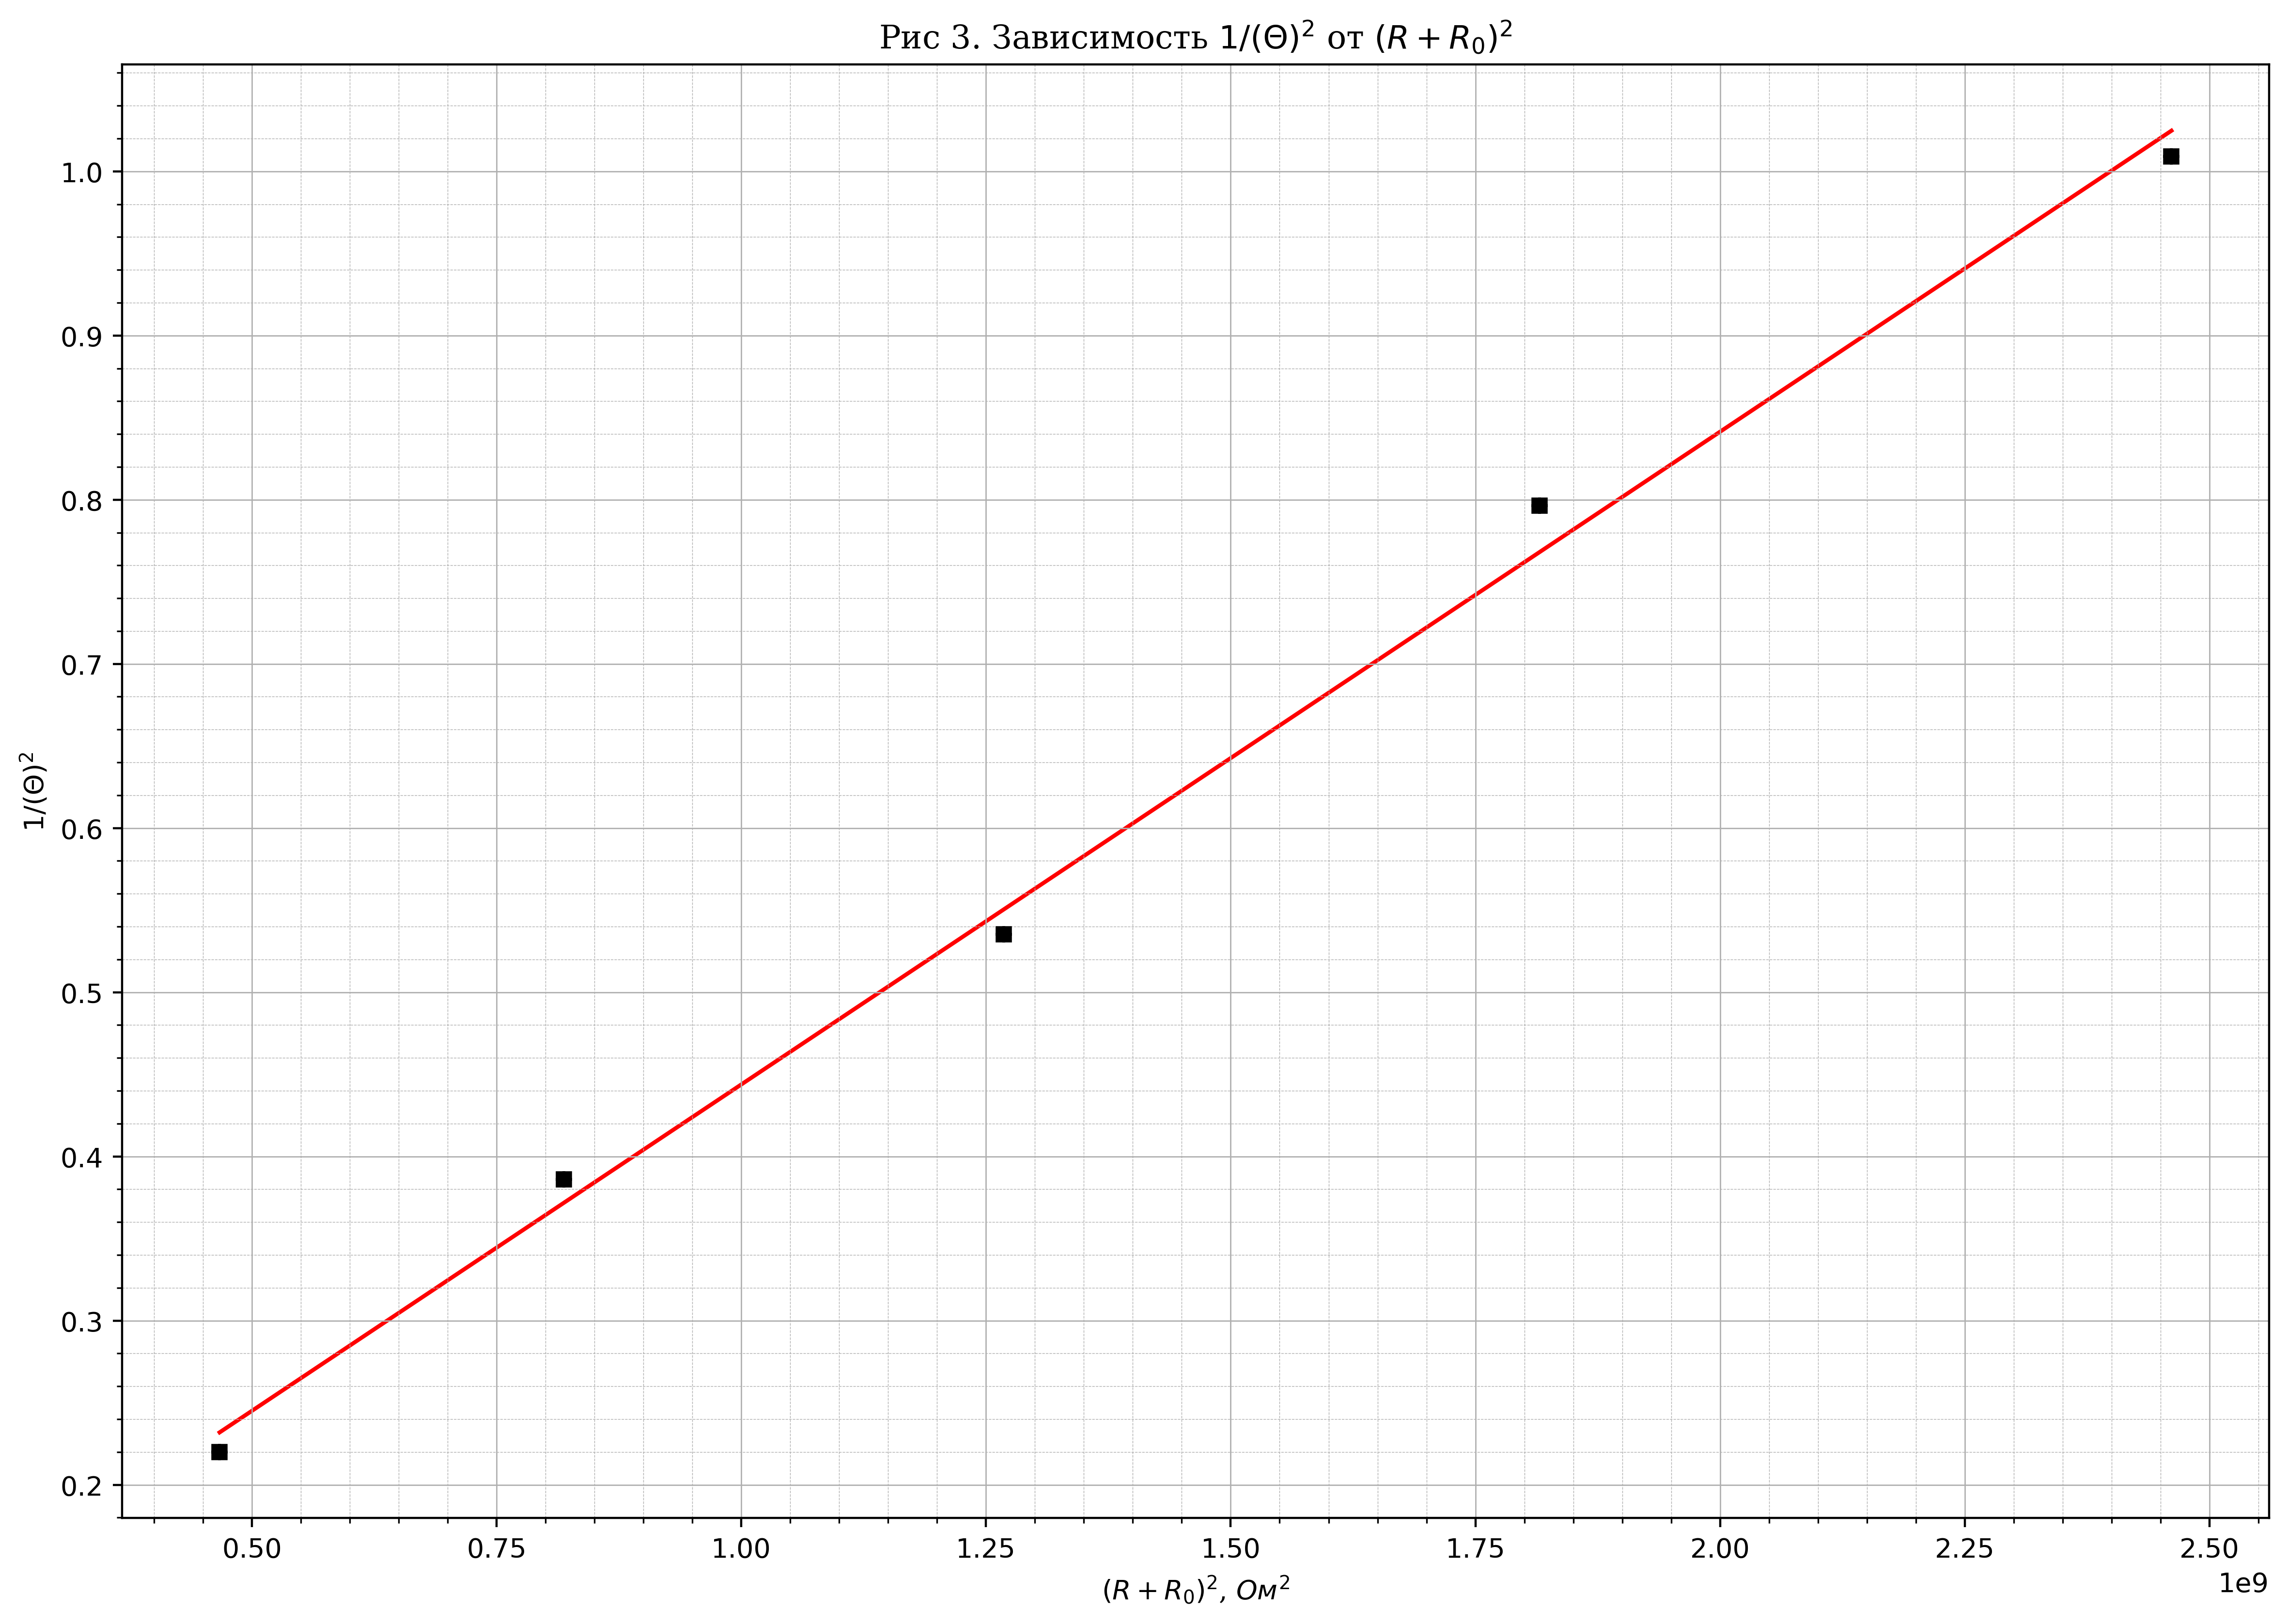

In [7]:
fig2 = mg.make_figure(dpi_mode='high')
ax2 = fig2.add_subplot()
mg.set_grids(fig2)
mg.set_label(ax2, '$(R+R_0)^2$, $Ом^2$', '$1/(\Theta)^2$')
mg.set_title(ax2, 'Зависимость $1/(\Theta)^2$ от $(R+R_0)^2$')

X = np.array( Rt['R, Ом']+R0 )**2
Y = (1/(thetas))**2

mg.draw_errorbar(ax2, X, Y)
k, s_k, b, s_b = mg.linls(X, Y)
mg.display_linls(ax2, text=True)

Rkr = (1/(2*np.pi))*np.sqrt( 1/k ) - R0
print(Rkr)

sigma = (1/np.sqrt(k**3)) * s_k / 4 / np.pi
sigma

In [8]:
def RK(R, t):
    return (R0 + R) / (np.sqrt( 1 + (2*np.pi/t)**2 )) - R0

RKs = [ RK(R, t) for R, t in zip(Rt['R, Ом'], thetas) ]
RKs

[6332.72413434235,
 6489.250458176866,
 6959.730079551539,
 6871.341033337766,
 7152.762250799154]

In [9]:
Rx2 = pd.read_csv('Rx2.tsv', sep='\t')
Rx2

,"R, Om","x, cm"
0,8000,25.00
1,9000,22.40
2,10000,20.15
3,12000,16.80
4,15000,13.45
5,19000,10.60
6,23000,8.75
7,28000,7.15
8,35000,5.70
9,39000,5.50


Коэффиценты прямой: k, s_k, b, s_b
2.949376111877445e-09	1.4918691384202068e-11	7.377510628144808e-10	1.0597077801460986e-10
CI = 8.051796785425425e-08


5.0285725283136315e-09

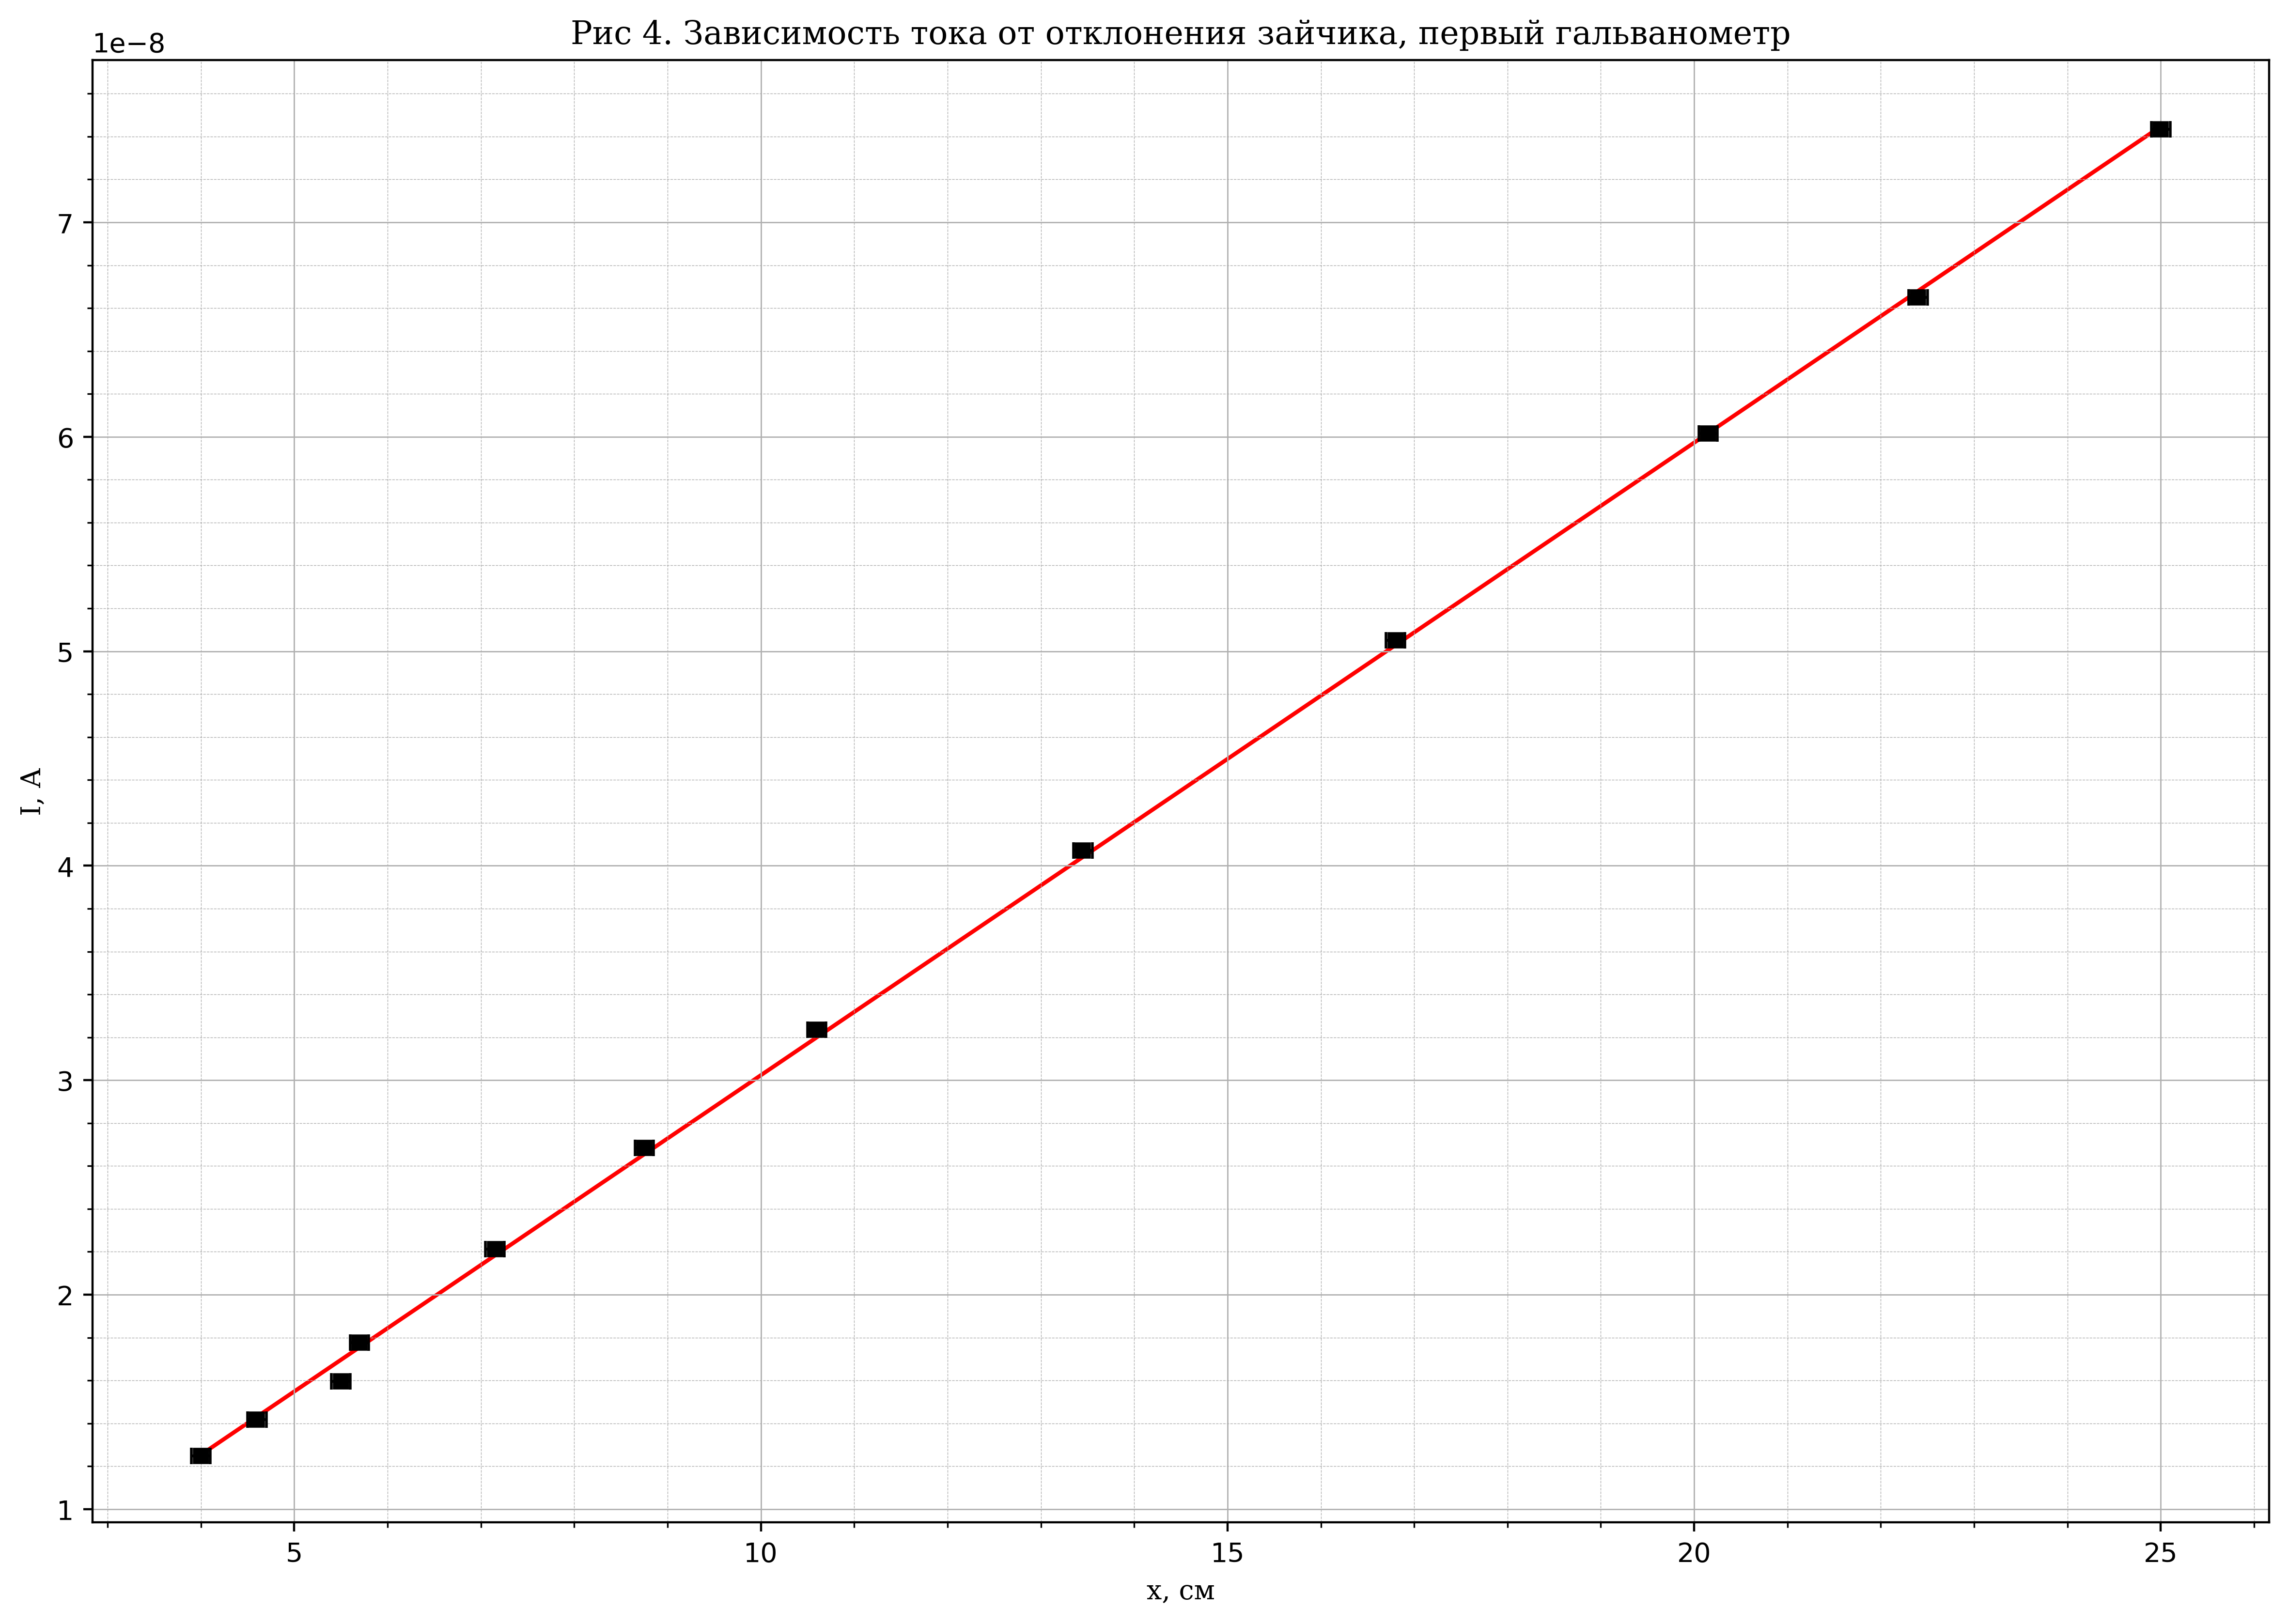

In [10]:
U0 = 63 * (3/150)
R2 = 10_000
R1 = R2 / 2000
R0 = 475
a = 135.5


import matplotlib.pyplot as plt
import mygraph as mg
import numpy as np
I = np.array( [ U0 * (R1/R2) * 1/(R + R0) for R in Rx2['R, Om'] ] )

fig4 = mg.make_figure(dpi_mode='high')
ax4 = fig4.add_subplot()
mg.set_grids(fig4)
mg.set_label(ax4, 'x, см', 'I, А')
mg.set_title(ax4, 'Зависимость тока от отклонения зайчика, первый гальванометр')

mg.draw_errorbar(ax4, Rx2['x, cm'], I, x_err=0.1)
k, s_k, b, s_b = mg.linls(np.array(Rx2['x, cm']), I)
mg.display_linls(ax4)

# Ix = [i / x for i, x in zip(I, Rx2['x, cm'])]
Ix = k*10
a = 136.5/1e2 # см
CI = Ix  * 2*a
print(f'CI = {CI}')
sigma = np.sqrt(
    np.square( 2 * k * 0.5 ) +\
    np.square( 2 * 136.5 * s_k )
)
sigma